### Import Necessary Libraries

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt

### Data loading and proprocessing

In [ ]:
# df = pd.read_csv('Sales Transaction v.4a.csv')
# df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [ ]:
# df.shape

(536350, 8)

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [ ]:
# dateFormat = '%m/%d/%Y'
# df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [ ]:
# Create New Columns : TotalMoney
# df['TotalMoney'] = df['Price'] * df['Quantity']

# # Create New Columns : Month
# df['Month'] = pd.DatetimeIndex(df['Date']).month

# # Create New Columns : Year
# df['Year'] = pd.DatetimeIndex(df['Date']).year

# df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019


In [ ]:
# Check Null Value 
# df.isnull().sum() 

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
TotalMoney        0
Month             0
Year              0
dtype: int64

There are some CustomerNos missing so lets first check if CustomerNo is unique or just randomly assigned. If the customers are reused i.e. they use the same CustomerNos every month or in any interval it is not important.

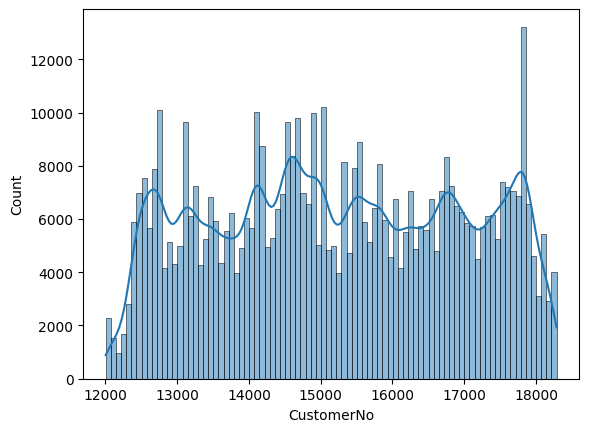

<Figure size 1200x800 with 0 Axes>

CustomerNo range: 12004.0 to 18287.0
Unique Customer Numbers: 4738
Missing customer numbers: [12000, 12001, 12002, 12003, 12005, 12007, 12009, 12010, 12011, 12012, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12027, 12028, 12029, 12030, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12044, 12045, 12046, 12047, 12048, 12049, 12051, 12052, 12053, 12054, 12055, 12056, 12058, 12059, 12061, 12062, 12064, 12065, 12066, 12068, 12069, 12070, 12072, 12073, 12074, 12075, 12076, 12077, 12079, 12083, 12084, 12085, 12086, 12088, 12091, 12092, 12094, 12095, 12096, 12097, 12098, 12099, 12101, 12102, 12103, 12104, 12105, 12106, 12107, 12108, 12109, 12110, 12111, 12112, 12113, 12114, 12117, 12118, 12119, 12121, 12122, 12123, 12124, 12125, 12126, 12127, 12129, 12131, 12132, 12133, 12135, 12136, 12137, 12138, 12139, 12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149, 12150, 12152, 12153, 12155, 12156, 12157, 12158, 12159, 12162, 12163, 121

In [ ]:
# sns.histplot(df['CustomerNo'], kde=True)
# plt.figure(figsize=(12,8))
# plt.show()

# min_customer = df['CustomerNo'].min()
# max_customer = df['CustomerNo'].max()
# print(f"CustomerNo range: {min_customer} to {max_customer}")

# unique_customers = df['CustomerNo'].nunique()
# print(f"Unique Customer Numbers: {unique_customers}")

# all_customers = set(range(12000, 18001))  # inclusive
# actual_customers = set(df['CustomerNo'].unique())

# missing_customers = all_customers - actual_customers
# print(f"Missing customer numbers: {sorted(missing_customers)}")
# print(f"Count of missing numbers: {len(missing_customers)}")

In [ ]:
# country_counts = df.groupby('CustomerNo')['Country'].nunique()
# suspicious_customers = country_counts[country_counts > 1]
# if len(suspicious_customers) == 0:
#     print("Each CustomerNo is associated with only one Country.")
# else:
#     print("Some CustomerNo values are associated with multiple Countries.")
#     print(suspicious_customers)

Each CustomerNo is associated with only one Country.


In [ ]:
# missing_cust_rows = df[df['CustomerNo'].isna()]
# transactions_with_missing = missing_cust_rows['TransactionNo'].unique()
# print(f"{len(transactions_with_missing)} transaction(s) with missing CustomerNo")

# multi_customer_transactions = []
# for txn in transactions_with_missing:
#     txn_rows = df[df['TransactionNo'] == txn]
#     if txn_rows['CustomerNo'].notna().any():
#         multi_customer_transactions.append(txn)

# if len(transactions_with_missing) == 1:
#     print("Missing CustomerNo occurs only in a single transaction.")
# elif len(multi_customer_transactions) == 0:
#     print("No transaction with missing CustomerNo also has a valid CustomerNo — they are entirely missing.")
# else:
#     print("Some transactions with missing CustomerNo also have valid CustomerNo in other rows:")
#     print(multi_customer_transactions)

36 transaction(s) with missing CustomerNo
No transaction with missing CustomerNo also has a valid CustomerNo — they are entirely missing.


In [ ]:
# unique_countries = missing_cust_rows['Country'].dropna().unique()

# if len(unique_countries) == 1:
#     print(f"All missing CustomerNo transactions are from the same country: {unique_countries[0]}")
# else:
#     print(f"Missing CustomerNo transactions are from multiple countries: {unique_countries}")

All missing CustomerNo transactions are from the same country: United Kingdom


In [ ]:
# new_customer_ids = range(11500, 11636)
# txn_to_customer = dict(zip(transactions_with_missing, new_customer_ids))

# def fill_customer(row):
#     if pd.isna(row['CustomerNo']) and row['TransactionNo'] in txn_to_customer:
#         return txn_to_customer[row['TransactionNo']]
#     else:
#         return row['CustomerNo']

# df['CustomerNo'] = df.apply(fill_customer, axis=1)

In [ ]:
# df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
TotalMoney       0
Month            0
Year             0
dtype: int64

In [ ]:
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('C')
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('A')
# df['TransactionNo'] = df['TransactionNo'].astype(str).str.lstrip('B')

In [ ]:
# Convert all Quantity values to positive
# df['Quantity'] = df['Quantity'].abs()

In [ ]:
# df.to_csv("cleaned_sales_data.csv", index=False)

# EDA

In [118]:
df = pd.read_csv("cleaned_sales_data.csv")

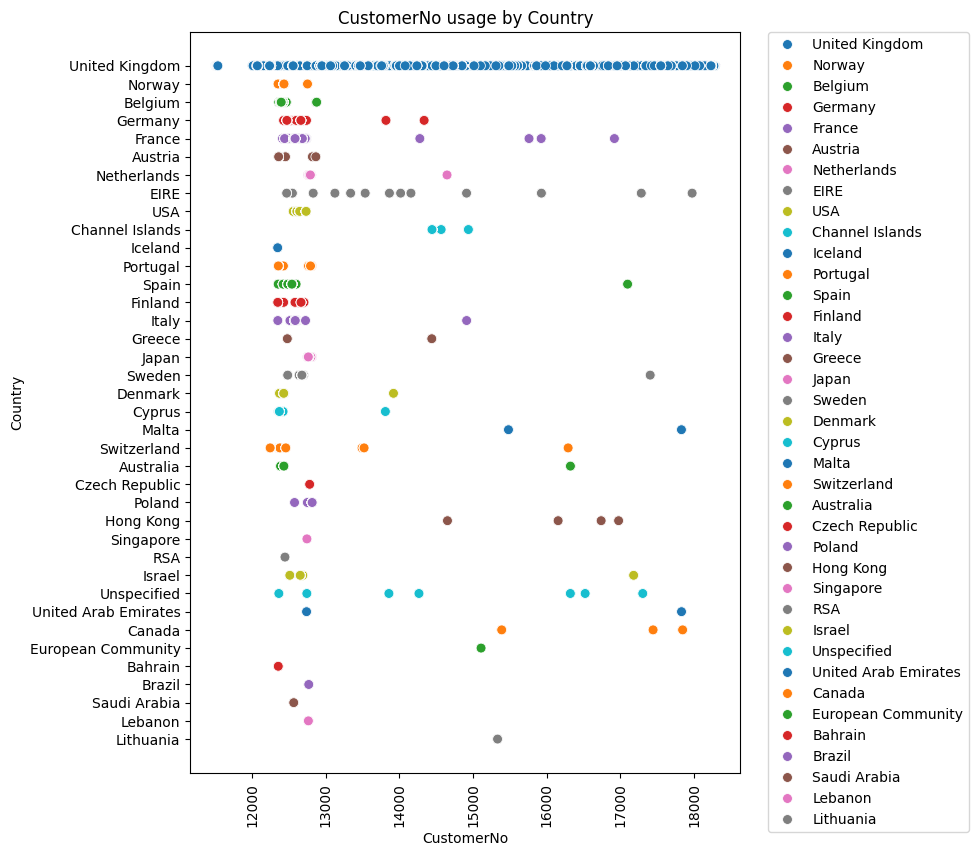

In [ ]:
# plt.figure(figsize=(10, 9))
# sns.scatterplot(data=df, x='CustomerNo', y='Country', hue='Country', palette='tab10', s=50)

# plt.title("CustomerNo usage by Country")
# plt.xlabel("CustomerNo")
# plt.ylabel("Country")
# plt.xticks(rotation=90)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# plt.tight_layout()
# plt.show()

From this plot we can see that CustomerNos are not reused and are helpful to identify our most valuable customer. We also see the distribution of our customer base across different countries.

## What are the most popular and money generating products? Also identify most valuable customers.

##### 10 Transactions With Highest Total Money

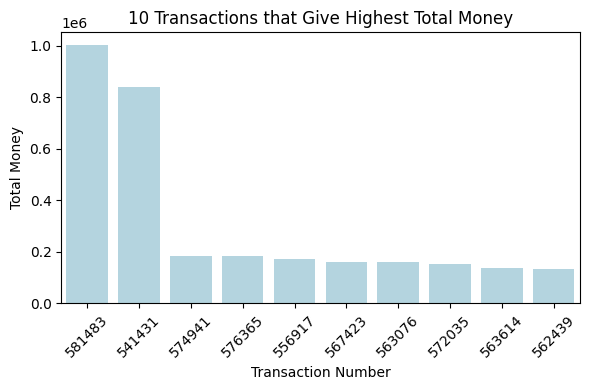

In [120]:
# listTransaction = df['TransactionNo'].unique()
# listTotalMoney = []

# # Loop for Store Data
# for i in listTransaction:
#     totalMoney = df['TotalMoney'].loc[df['TransactionNo'] == i].sum()
#     listTotalMoney.append(totalMoney)

# dictTransaction = {
#     'TransactionNo' : listTransaction,
#     'TotalMoney' : listTotalMoney
# }

# # Adjust DataFrame
# dfTransaction = pd.DataFrame(dictTransaction)
# dfTransaction = dfTransaction.sort_values('TotalMoney', ascending=False).head(10)
# dfTransaction = dfTransaction.reset_index(drop=True)
# dfTransaction.to_csv("TrasactionMoney.csv", index=False)
dfTransaction = pd.read_csv("top_10_transactions.csv")
dfTransaction = dfTransaction.sort_values("TotalMoney", ascending=False)

dfTransaction["TransactionNo"] = pd.Categorical(
    dfTransaction["TransactionNo"],
    categories=dfTransaction["TransactionNo"],
    ordered=True
)

plt.figure(figsize=(6, 4))
sns.barplot(data=dfTransaction, x='TransactionNo', y='TotalMoney', color="lightblue")
plt.title('10 Transactions that Give Highest Total Money')
plt.xticks(rotation=45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.tight_layout()
plt.show()


In [ ]:
# Get the top two transaction numbers
top2_txn = dfTransaction['TransactionNo'][:2].to_list()
print(top2_txn)
products_top2 = df[df['TransactionNo'].isin(top2_txn)][['TransactionNo', 'ProductNo', 'ProductName', 'Price', 'Quantity', 'CustomerNo', 'Country', 'TotalMoney']]
products_top2

[581483, 541431]


,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney
142,581483,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,1002718.1
473985,541431,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,840113.8


    ProductNo                          ProductName  Count
305     23203              Jumbo Bag Vintage Doily      6
303     23201                   Jumbo Bag Alphabet      6
309     23207            Lunch Bag Alphabet Design      6
298     23192  Bundle Of 3 Alphabet Exercise Books      5
152     22492               Mini Paint Set Vintage      5
159     22551             Plasters In Tin Spaceboy      5
66      21915                 Red Harmonica In Box      5
56      21731        Red Toadstool Led Night Light      4
13      20971     Pink Blue Felt Craft Trinket Box      4
108     22158   3 Hearts Hanging Decoration Rustic      4


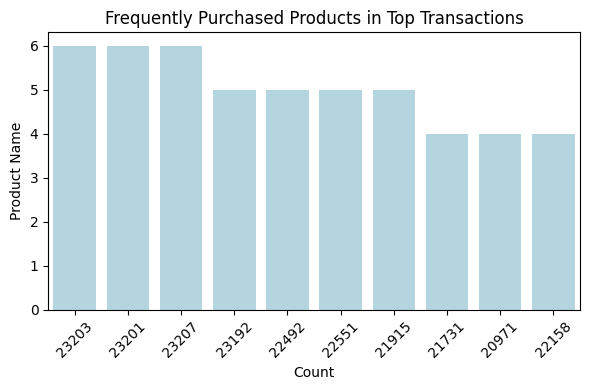

In [134]:
top_txn = dfTransaction['TransactionNo'].to_list()
products_top = df[df['TransactionNo'].isin(top_txn)][['TransactionNo', 'ProductNo', 'ProductName']]
product_counts = (
    products_top
    .groupby(['ProductNo', 'ProductName'])
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)
)
print(product_counts[:10])

# Plot count plot
plt.figure(figsize=(6, 4))
sns.barplot(data=product_counts[:10], x='ProductNo', y='Count', color='lightblue')
plt.title('Frequently Purchased Products in Top Transactions')
plt.xticks(rotation=45)
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

##### 10 Products that Give Highest Total Money

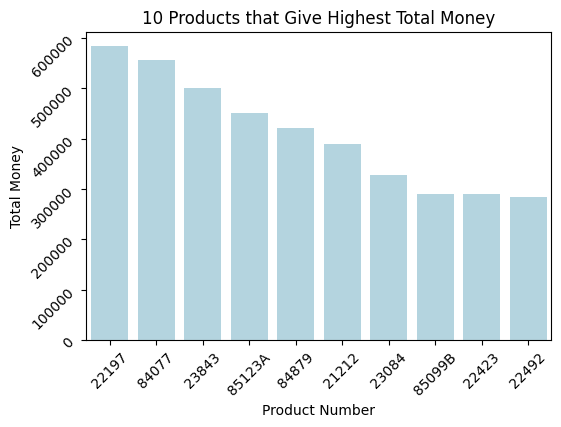

  ProductNo  TotalMoney                         ProductName
0     22197   583286.51                      Popcorn Holder
1     84077   557170.43   World War 2 Gliders Asstd Designs
2     23843   501359.05           Paper Craft Little Birdie
3    85123A   451401.70  Cream Hanging Heart T-Light Holder
4     84879   420743.70       Assorted Colour Bird Ornament
5     21212   388424.61     Pack Of 72 Retrospot Cake Cases
6     23084   327794.21                  Rabbit Night Light
7    85099B   290474.52             Jumbo Bag Red Retrospot
8     22423   289288.60            Regency Cakestand 3 Tier
9     22492   284870.92              Mini Paint Set Vintage


In [135]:
# # Variable to Store Data
# listProduct = df['ProductNo'].unique()
# listTotalMoney = []

# # Loop for Store Data
# for i in listProduct:
#     totalMoney = df['TotalMoney'].loc[df['ProductNo'] == i].sum()
#     listTotalMoney.append(totalMoney)

# # Dictionary for DataFrame
# dictProduct = {
#     'ProductNo' : listProduct,
#     'TotalMoney' : listTotalMoney
# }

# # Adjust DataFrame
# dfProduct = pd.DataFrame(dictProduct)
# dfProduct = dfProduct.sort_values('TotalMoney',ascending=False).head(10)
# dfProduct = dfProduct.reset_index(drop=True)

dfProduct = pd.read_csv("top_10_products.csv")
# Create Figure
plt.figure(figsize = (6,4))
sns.barplot(data = dfProduct, x = 'ProductNo',y = 'TotalMoney', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()
print(dfProduct)
# Show Product Number, Product Name and Total Money
# listProductName = []
# for i in dfProduct['ProductNo']:
#     a = df['ProductName'].loc[df['ProductNo'] == i].unique()[0]
#     listProductName.append(a) 
# dfProduct['ProductName'] = listProductName
# print(dfProduct)

##### 10 Countries that GIve Total Highest Money

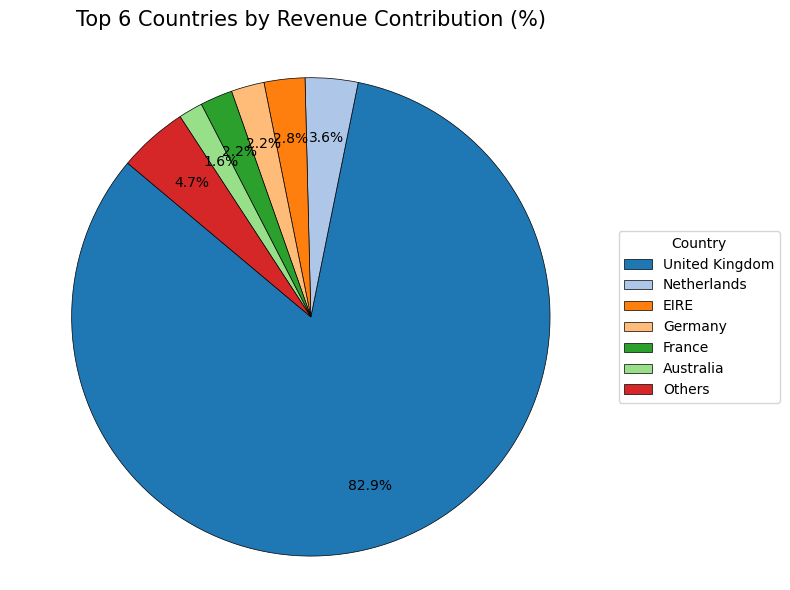

In [158]:
# Variable to Store
listCountry = df['Country'].unique()
listTotalMoney = []

# Loop to Store Data
for i in listCountry:
    totalMoney = round(df['TotalMoney'].loc[df['Country'] == i].sum(), 2)
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictCountry = {
    'CountryName': listCountry,
    'TotalMoney': listTotalMoney
}

# Adjust DataFrame
dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('TotalMoney', ascending=False).reset_index(drop=True)

# Keep top 6 countries, group the rest into "Others"
top6 = dfCountry.head(6)
others = pd.DataFrame({
    'CountryName': ['Others'],
    'TotalMoney': [dfCountry['TotalMoney'][6:].sum()]
})
dfCountryFinal = pd.concat([top6, others])

# Create Pie Chart
plt.figure(figsize=(8, 6))
colors = plt.cm.tab20.colors

# Plot the pie chart
wedges, texts, autotexts = plt.pie(
    dfCountryFinal['TotalMoney'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10},
    pctdistance=0.75
)

# Legend with country names
plt.legend(wedges, dfCountryFinal['CountryName'], title="Country", loc="center left", bbox_to_anchor=(1, 0.5))

# Adjust percentage label positioning and styling
for autotext in autotexts:
    autotext.set_rotation_mode('anchor')
    autotext.set_ha('center')
    autotext.set_va('center')

plt.title('Top 6 Countries by Revenue Contribution (%)', pad=20, fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


##### Total Money Every Months in 2019

In [141]:
# Calculate total income for each year-month
df['YearMonth'] = df['Date'].astype(str).str[:7]  # Format: YYYY-MM

monthly_income = (
    df.groupby('YearMonth')['TotalMoney']
    .sum()
    .reset_index()
    .rename(columns={'TotalMoney': 'TotalIncome'})
)
monthly_income = monthly_income[:-1]
print(monthly_income)

   YearMonth  TotalIncome
0    2018-12   4234147.48
1    2019-01   3649506.42
2    2019-02   3299537.56
3    2019-03   4353308.78
4    2019-04   3416109.24
5    2019-05   4530850.36
6    2019-06   4410422.29
7    2019-07   4518347.92
8    2019-08   4614243.55
9    2019-09   6542706.30
10   2019-10   6971407.82
11   2019-11   7745257.92


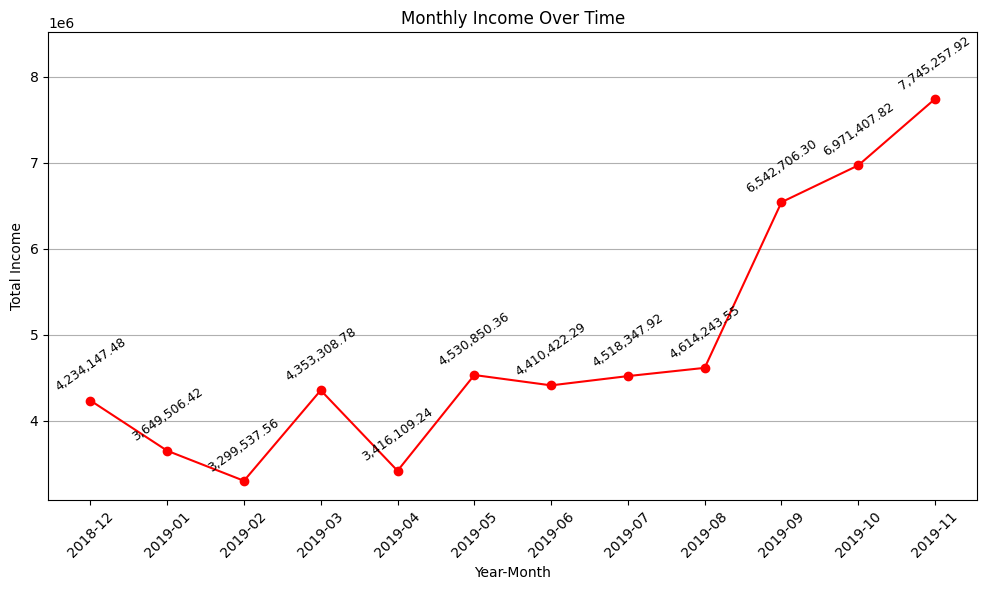

In [145]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_income['YearMonth'], monthly_income['TotalIncome'], color='red', marker='o', linestyle='-')
plt.title('Monthly Income Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
y_max = monthly_income['TotalIncome'].max()
plt.ylim(top=y_max * 1.10)
# Add total income values above each marker
for x, y in zip(monthly_income['YearMonth'], monthly_income['TotalIncome']):
    plt.text(x, y + monthly_income['TotalIncome'].max() * 0.01, f'{y:,.2f}', ha='center', va='bottom', fontsize=9, rotation=35)
plt.tight_layout()
plt.show()

    MonthName  TotalMoney
11    January  3649506.42
10   February  3299537.56
9       March  4353308.78
8       April  3416109.24
7         May  4530850.36
6        June  4410422.29
5        July  4518347.92
4      August  4614243.55
3   September  6542706.30
2     October  6971407.82
1    November  7745257.92
0    December  1994178.62


c:\Users\Nitro 5\anaconda3\envs\main\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\Nitro 5\anaconda3\envs\main\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


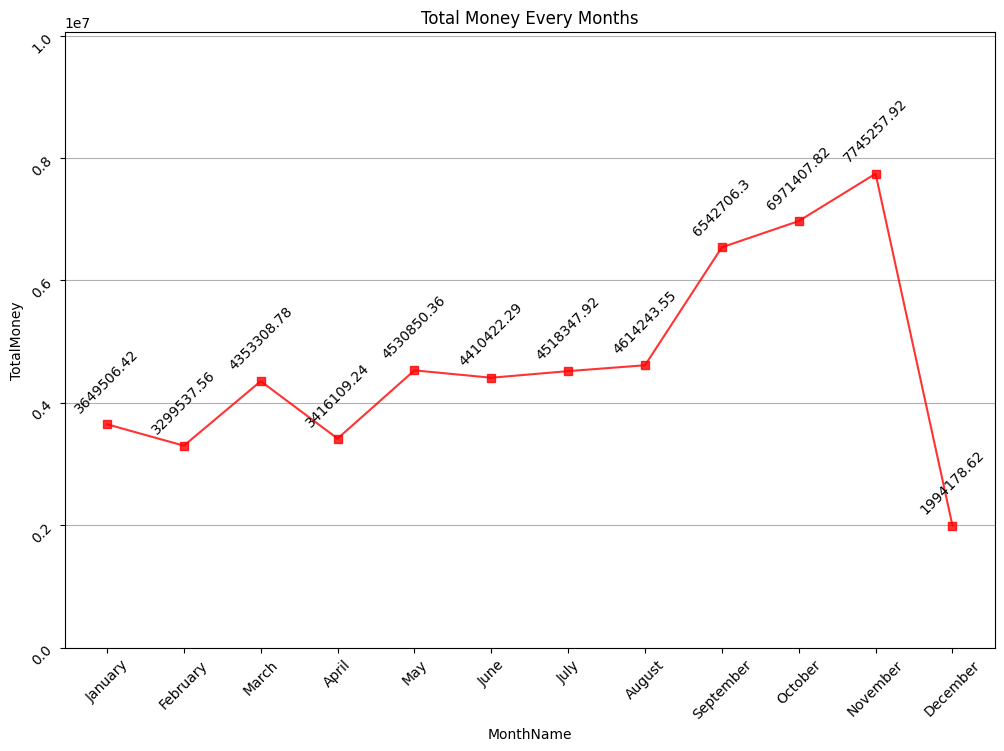

In [137]:
# Variable to Store
listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalMoney'].loc[(df['Month']==i)&(df['Year']==2019)].sum(),2)
    listTotalMoney.append(totalMoney)
    
# Dictionary for DataFrame
dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]
print(dfMonth)
# Create Figure
plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

##### Country that Gives Highest Total Money from Each Month

In [128]:
def searchTotalMoney(country,month):
    return round(df['TotalMoney'].loc[(df['Country'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth


,Month,Country Name,Total Money
0,January,United Kingdom,2766521.62
1,February,United Kingdom,2704022.15
2,March,United Kingdom,3537492.90
3,April,United Kingdom,3053768.60
4,May,United Kingdom,3689507.59
5,June,United Kingdom,3500065.77
6,July,United Kingdom,3765557.98
7,August,United Kingdom,3667938.41
8,September,United Kingdom,5480320.68
9,October,United Kingdom,5632406.43


##### Total Money each Month that is Received from Top 10 Products that Give Highest Total MOney in 2019

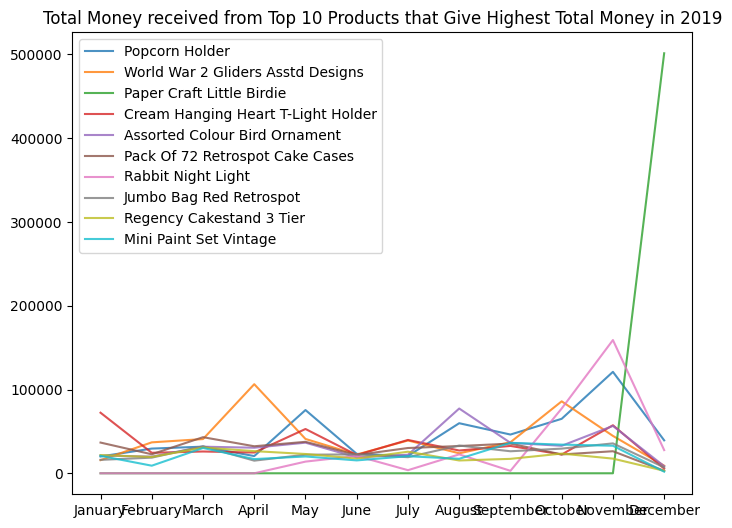

In [181]:
topTenCountry = dfCountry['CountryName'].unique().copy()
listMonthTopTen = listMonth

plt.figure(figsize = (8,6))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()
for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

##### Total Quantity each Month from Top 10 Products that Give Highest Total MOney in 2019

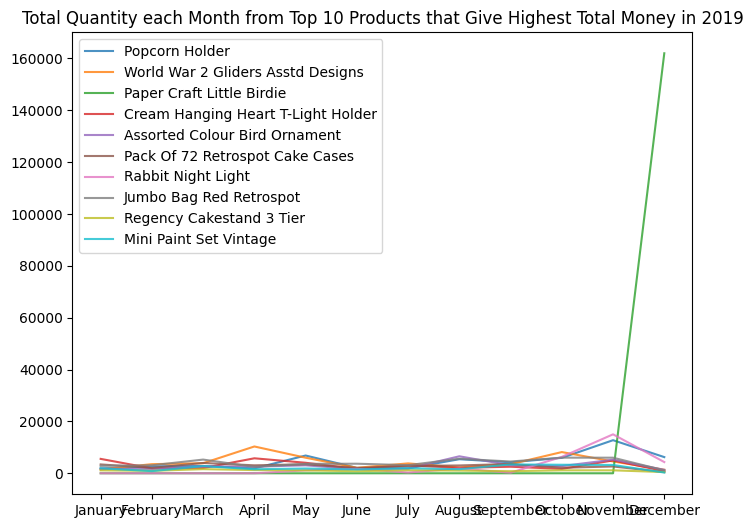

In [177]:
plt.figure(figsize = (8,6))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['Quantity'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

### Revenue Prediction
**Goal**: Predict future revenue based on historical data.